<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/aapl_kmeans_trading_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ✅ Protocol Buffer Fix (for TensorFlow)
!pip install --upgrade protobuf
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.2 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.30.2 which is incompatible.
google-cloud-firestore 2.20.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.2 which is incompatible.
google-cloud-aiplatform 1.87.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6

In [2]:
# ✅ Install TensorFlow (latest stable GPU-compatible version)
!pip install tensorflow

# ✅ Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

# ✅ Reinstall RAPIDS dependencies if needed (optional reset)
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [1]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

# =========================
# ✅ Version Checks
# =========================
print("📦 Library Versions")
print("--------------------")
print("✅ PyTorch:", torch.__version__)
print("✅ CUDA:", torch.version.cuda)
print("✅ cuDF:", cudf.__version__)
print("✅ cuML:", cuml.__version__)
print("✅ Dask:", dask.__version__)
print("✅ Pandas:", pd.__version__)
print("✅ NumPy:", np.__version__)
print("✅ SciPy:", scipy.__version__)
print("✅ LightGBM:", lgb.__version__)
print("✅ Gymnasium:", gym.__version__)
print("✅ Stable Baselines3:", stable_baselines3.__version__)

# =========================
# ✅ GPU Check (Torch + NVIDIA)
# =========================
print("\n🖥️ GPU Availability")
print("--------------------")
print("✅ PyTorch GPU Available:", torch.cuda.is_available())
print("✅ GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("✅ GPU Name:", torch.cuda.get_device_name(0))


📦 Library Versions
--------------------
✅ PyTorch: 2.6.0+cu124
✅ CUDA: 12.4
✅ cuDF: 24.12.00
✅ cuML: 24.12.00
✅ Dask: 2024.11.2
✅ Pandas: 2.2.3
✅ NumPy: 2.1.3
✅ SciPy: 1.15.2
✅ LightGBM: 4.5.0
✅ Gymnasium: 1.1.1
✅ Stable Baselines3: 2.6.0

🖥️ GPU Availability
--------------------
✅ PyTorch GPU Available: True
✅ GPU Count: 1
✅ GPU Name: Tesla T4


In [2]:
# ✅ Core Libraries
import gc
import json
import os
import pickle
import sys
import time
from collections import defaultdict, deque
from datetime import datetime

# ✅ Data Science Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba
import IPython.display as display

# ✅ Machine Learning & Data Processing
import joblib
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
)
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import MinMaxScaler

# ✅ Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model

# ✅ RAPIDS Libraries (cuDF & cuML for GPU acceleration)
import cupy as cp

# ✅ Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

# ✅ Gym & Trading Environments
import gym
import gymnasium as gym
import gym_anytrading
from gym.spaces import Box
from gymnasium.spaces import Box as GymBox, Discrete
from gymnasium.wrappers import TimeLimit
from gym_anytrading.envs import StocksEnv

# ✅ Financial & Stock Data Libraries
import yfinance as yf

# ✅ PyTorch Essentials
import torch
import torch.nn as nn
import torch.optim as optim


In [3]:
# ✅ Set CUDA Paths (Ensuring GPU Utilization)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [4]:
!nvidia-smi

Fri Apr  4 00:08:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
# ================================
# ✅ Utility Functions
# ================================

def fix_dataframe_index(df):
    """
    Flattens MultiIndex columns and removes duplicated columns.
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]

def calculate_rsi(series, period=14):
    """
    Calculates the Relative Strength Index (RSI) for a given price series.
    """
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / (loss + 1e-6)
    return 100 - (100 / (1 + rs))

def compute_technical_indicators(df):
    """
    Applies technical indicators including Bollinger Bands, Stochastic Oscillator,
    volatility, momentum, trend, and volume indicators.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['STD_20'] = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']

    df['Lowest_Low'] = df['Low'].rolling(window=14).min()
    df['Highest_High'] = df['High'].rolling(window=14).max()
    denominator = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denominator) * 100

    df['volatility'] = df['Close'].pct_change().rolling(20).std()
    df['ROC'] = df['Close'].pct_change(periods=10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (
        0.015 * typical_price.rolling(20).std()
    )

    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(window=50).mean()
    df['Expanding_Mean'] = df['Close'].expanding(min_periods=1).mean()

    df.dropna(inplace=True)
    return df

def generate_trade_labels(df, lookahead=10, threshold_factor=2):
    """
    Generates binary and dynamic trade labels based on future returns
    and volatility-adjusted thresholds.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    if 'Close' not in df.columns:
        raise KeyError("❌ 'Close' column is missing. Cannot generate trade labels.")

    df['Future_Close'] = df['Close'].shift(-lookahead)
    df['Price_Change'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.where(df['Price_Change'] > 0.03, 1, 0)

    buy_threshold = df['volatility'] * threshold_factor
    sell_threshold = -df['volatility'] * threshold_factor

    df['Dynamic_Label'] = np.where(df['Price_Change'] > buy_threshold, 1,
                            np.where(df['Price_Change'] < sell_threshold, -1, 0))

    df.dropna(inplace=True)
    return df

In [23]:
# ✅ Enable CUDA Benchmarking for Faster GPU Computation
torch.backends.cudnn.benchmark = True

# ✅ Load Stock Data Directly (No Retry Logic)
def load_stock_data(ticker, period="720d", interval="1h"):
    print(f"📡 Downloading {ticker} stock data...")
    df_live = yf.download(ticker, period=period, interval=interval)
    if not df_live.empty:
        print("✅ Successfully downloaded stock data!")
        df_live.reset_index(inplace=True)
        return df_live
    print("❌ Failed to download stock data.")
    return None

# ✅ Load Stock Data or Fall Back to Backup Dataset
df_live = load_stock_data("tsla")
if df_live is None:
    print("⚠️ Using previously saved dataset instead.")
    file_path = "/content/drive/My Drive/tslafeature_engineered_dataset.csv"
    df_live = pd.read_csv(file_path)

df = df_live.copy()

📡 Downloading tsla stock data...


[*********************100%***********************]  1 of 1 completed

✅ Successfully downloaded stock data!


In [24]:
# ================================
# ✅ Utility Functions
# ================================

def fix_dataframe_index(df):
    """
    Flattens MultiIndex columns and removes duplicated columns.
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]


def calculate_rsi(series, period=14):
    """
    Calculates the Relative Strength Index (RSI) for a given price series.
    """
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / (loss + 1e-6)
    return 100 - (100 / (1 + rs))


def compute_technical_indicators(df):
    """
    Applies technical indicators including RSI, MACD, Bollinger Bands, Stochastic Oscillator,
    OBV, CCI, momentum, trend, and volatility indicators.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    # ✅ RSI
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    # ✅ MACD + Signal Line
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # ✅ OBV
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    # ✅ Bollinger Bands
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['STD_20'] = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']

    # ✅ Stochastic Oscillator
    df['Lowest_Low'] = df['Low'].rolling(window=14).min()
    df['Highest_High'] = df['High'].rolling(window=14).max()
    denominator = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denominator) * 100

    # ✅ Volatility & Momentum
    df['volatility'] = df['Close'].pct_change().rolling(20).std()
    df['ROC'] = df['Close'].pct_change(periods=10)

    # ✅ Commodity Channel Index (CCI)
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (
        0.015 * typical_price.rolling(20).std()
    )

    # ✅ Price Rate of Change (PROC)
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100

    # ✅ Trend Features
    df['Rolling_Mean_50'] = df['Close'].rolling(window=50).mean()
    df['Expanding_Mean'] = df['Close'].expanding(min_periods=1).mean()

    df.dropna(inplace=True)
    return df


def generate_trade_labels(df, lookahead=10, threshold_factor=2):
    """
    Generates binary and dynamic trade labels based on future returns
    and volatility-adjusted thresholds.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    if 'Close' not in df.columns:
        raise KeyError("❌ 'Close' column is missing. Cannot generate trade labels.")

    df['Future_Close'] = df['Close'].shift(-lookahead)
    df['Price_Change'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.where(df['Price_Change'] > 0.03, 1, 0)

    buy_threshold = df['volatility'] * threshold_factor
    sell_threshold = -df['volatility'] * threshold_factor

    df['Dynamic_Label'] = np.where(
        df['Price_Change'] > buy_threshold, 1,
        np.where(df['Price_Change'] < sell_threshold, -1, 0)
    )

    df.dropna(inplace=True)
    return df


def drop_low_importance_features(df, feature_importance_df, threshold=1.0):
    """
    Drops low-importance features based on a given threshold.
    """
    low_importance_features = feature_importance_df[
        feature_importance_df['importance'] < threshold
    ]['feature'].tolist()

    if low_importance_features:
        df.drop(columns=low_importance_features, inplace=True)
        print(f"✅ Dropped low-importance features: {low_importance_features}")
    else:
        print("✅ No low-importance features found to drop.")

    return df


In [25]:
# ================================
# ✅ Unsupervised Clustering Module (GPU-Accelerated K-Means)
# ================================
from cuml.cluster import KMeans as cuKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def run_kmeans_clustering(df, n_clusters=3, visualize=True, assign_signals=True):
    """
    Perform GPU-accelerated K-Means clustering on selected technical indicators.

    Parameters:
        df (pd.DataFrame): Input DataFrame with technical indicators.
        n_clusters (int): Number of clusters to form.
        visualize (bool): Show 2D PCA cluster plot.
        assign_signals (bool): Assign arbitrary Buy/Sell/Hold signals.

    Returns:
        pd.DataFrame: Updated DataFrame with cluster and optional signal columns.
    """
    features = ['RSI', 'MACD', 'OBV']
    df_selected = df.dropna(subset=features).copy()

    # ✅ Early exit if not enough data
    if df_selected.shape[0] < n_clusters:
        print(f"⚠️ Not enough valid rows to form {n_clusters} clusters. Skipping clustering.")
        return df

    # ✅ Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_selected[features])

    # ✅ GPU-based clustering
    X_cudf = cudf.DataFrame.from_records(X_scaled)
    kmeans = cuKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cudf)

    df_selected['cluster'] = cluster_labels.to_pandas().values

    # ✅ Optional visualization
    if visualize:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels.to_pandas().values, cmap='viridis', s=10)
        plt.title(f"K-Means Clustering (n={n_clusters})")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

    # ✅ Optional signal assignment (arbitrary logic)
    if assign_signals:
        signal_map = {0: 'Hold', 1: 'Buy', 2: 'Sell'}
        df_selected['signal'] = df_selected['cluster'].map(signal_map)

    # ✅ Merge results back to original DataFrame
    df = df.merge(df_selected[['cluster'] + (['signal'] if assign_signals else [])],
                  left_index=True, right_index=True, how='left')

    return df


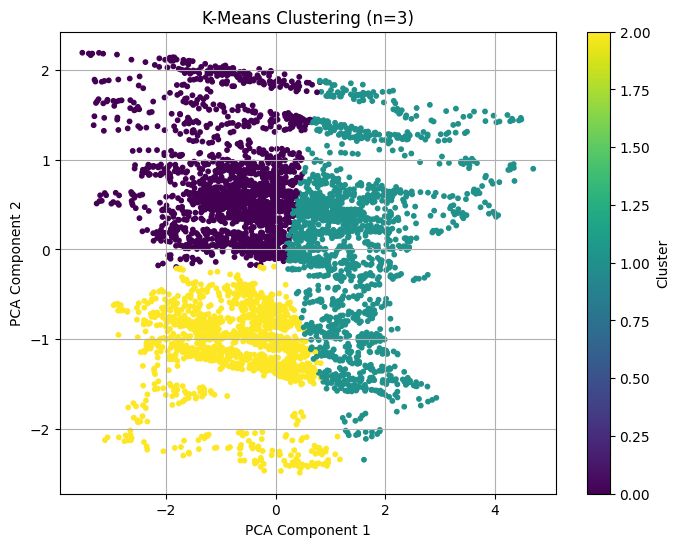

In [26]:
# 🚨 Make sure this is called BEFORE clustering
df = compute_technical_indicators(df)

# ✅ Now safe to run clustering
df = run_kmeans_clustering(df, n_clusters=3, visualize=True, assign_signals=True)


📊 Cluster-wise Mean Values
Price          RSI      MACD           OBV
cluster                                   
0        37.414592 -2.223746  1.111580e+09
1        70.379843  3.755245  8.995708e+08
2        41.589786 -1.456639  9.297159e+07


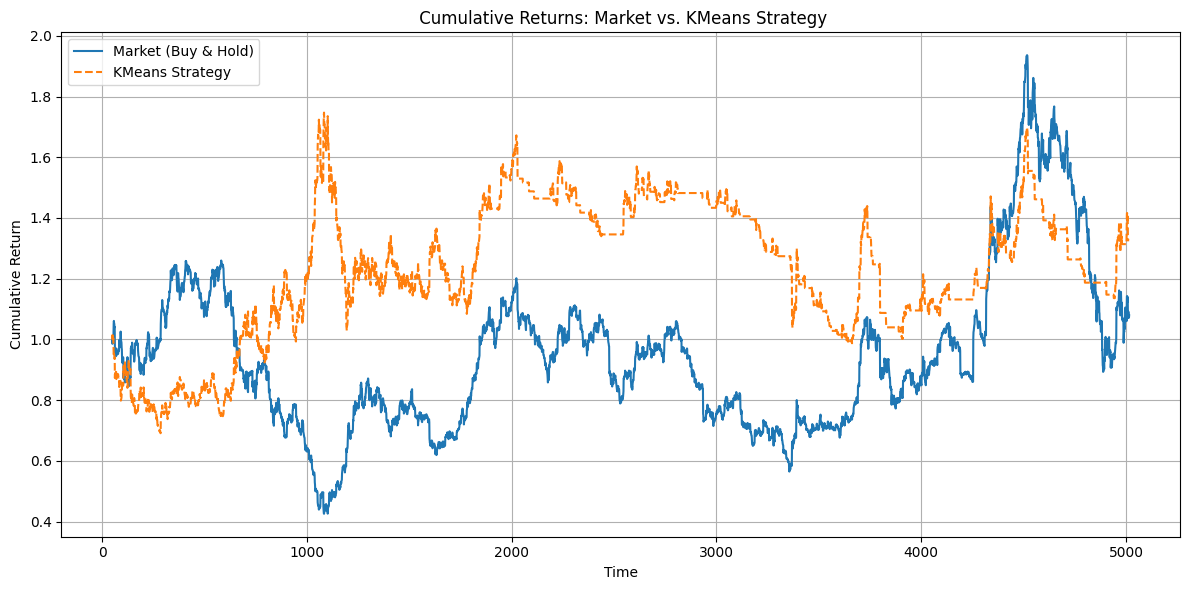

 Final Market Return: 7.95%
 Final Strategy Return: 32.66%
 Results saved to 'tsla_clustered_signals.csv'


In [27]:
# ================================
# ✅ Post-Clustering Analysis & Strategy Backtest
# ================================

# ✅ Summary Statistics Per Cluster
print("📊 Cluster-wise Mean Values")
cluster_summary = df.groupby('cluster')[['RSI', 'MACD', 'OBV']].mean()
print(cluster_summary)

# ✅ Map Signals to Numeric Positions
signal_map = {'Buy': 1, 'Sell': -1, 'Hold': 0}
df['position'] = df['signal'].map(signal_map)

# ✅ Calculate Strategy Returns
df['market_returns'] = df['Close'].pct_change()
df['strategy_returns'] = df['position'].shift(1) * df['market_returns']

# ✅ Compute Cumulative Returns
df['cumulative_market'] = (1 + df['market_returns']).cumprod()
df['cumulative_strategy'] = (1 + df['strategy_returns']).cumprod()

# ✅ Plot Strategy vs. Market Performance
plt.figure(figsize=(12, 6))
plt.plot(df['cumulative_market'], label='Market (Buy & Hold)')
plt.plot(df['cumulative_strategy'], label='KMeans Strategy', linestyle='--')
plt.title(" Cumulative Returns: Market vs. KMeans Strategy")
plt.xlabel("Time")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Print Final Return Comparison
final_market = df['cumulative_market'].iloc[-1]
final_strategy = df['cumulative_strategy'].iloc[-1]
print(f" Final Market Return: {(final_market - 1) * 100:.2f}%")
print(f" Final Strategy Return: {(final_strategy - 1) * 100:.2f}%")

# ✅ Save Full Dataset with Clusters and Signals
df.to_csv("tsla_clustered_signals.csv", index=False)
print(" Results saved to 'tsla_clustered_signals.csv'")


In [30]:
# Compute forward returns
df['Forward_Return'] = df['Close'].pct_change(periods=10).shift(-10)

# Group by cluster and evaluate average return
cluster_returns = df.groupby('cluster')['Forward_Return'].mean().sort_values(ascending=False)

# Map the highest performing cluster to 'Buy', lowest to 'Sell', middle to 'Hold'
signal_map = {cluster: signal for cluster, signal in zip(cluster_returns.index, ['Buy', 'Hold', 'Sell'])}
df['signal'] = df['cluster'].map(signal_map)

print("📊 Updated Signal Mapping based on Forward Returns:")
print(cluster_returns)


📊 Updated Signal Mapping based on Forward Returns:
cluster
0    0.005127
1    0.001629
2   -0.001106
Name: Forward_Return, dtype: float64


[*********************100%***********************]  1 of 1 completed


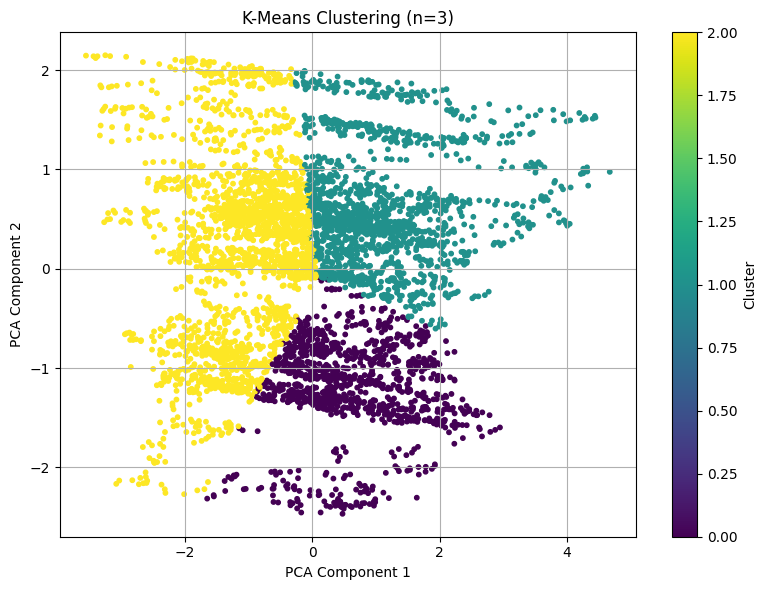

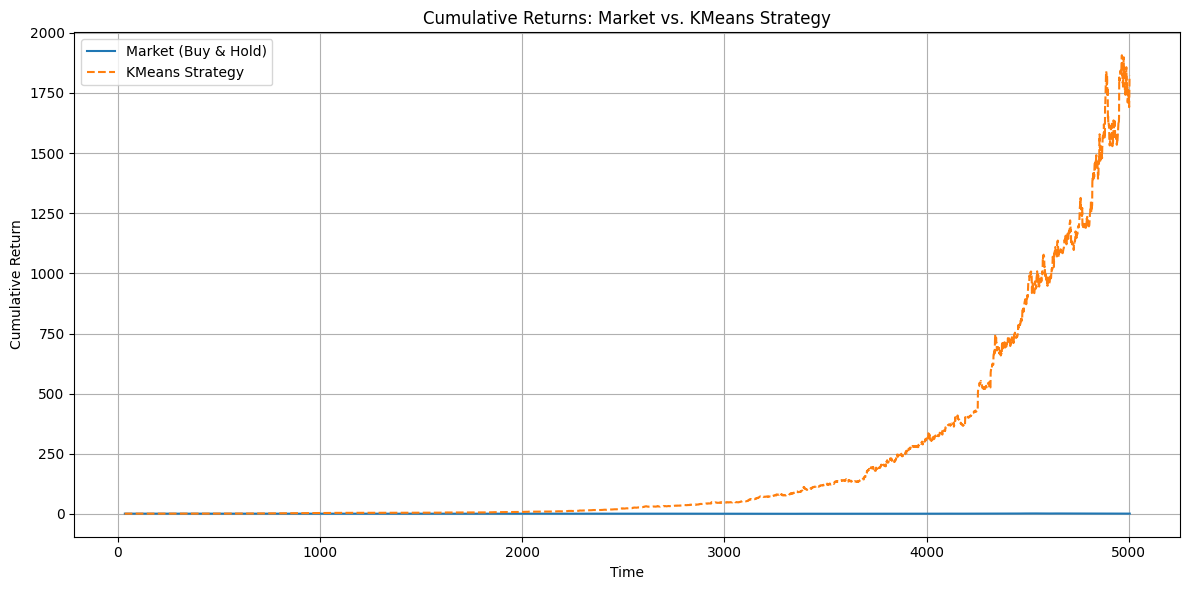

 Final Market Return: 20.83%
 Final Strategy Return: 182230.48%
 Results saved to 'tsla_clustered_signals.csv'


In [31]:
# ================================
# ✅ Imports and Setup
# ================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from cuml.cluster import KMeans as cuKMeans
import cudf

# ================================
# ✅ Utility Functions
# ================================
def fix_dataframe_index(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]

def compute_technical_indicators(df):
    df = df.copy()
    df = fix_dataframe_index(df)

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    df.dropna(inplace=True)
    return df

def generate_trade_labels(df, lookahead=10, threshold_factor=2):
    df = df.copy()
    df['Future_Close'] = df['Close'].shift(-lookahead)
    df['Price_Change'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['volatility'] = df['Close'].pct_change().rolling(20).std()
    buy_threshold = df['volatility'] * threshold_factor
    sell_threshold = -df['volatility'] * threshold_factor

    df['Dynamic_Label'] = np.where(
        df['Price_Change'] > buy_threshold, 1,
        np.where(df['Price_Change'] < sell_threshold, -1, 0)
    )
    df.dropna(inplace=True)
    return df

def run_kmeans_clustering(df, n_clusters=3, visualize=True, assign_signals=True):
    features = ['RSI', 'MACD', 'OBV']
    df_selected = df.dropna(subset=features).copy()

    if df_selected.shape[0] < n_clusters:
        print(f"\u26a0\ufe0f Not enough rows for {n_clusters} clusters.")
        return df

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_selected[features])
    X_cudf = cudf.DataFrame.from_records(X_scaled)
    kmeans = cuKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cudf)

    df_selected['cluster'] = cluster_labels.to_pandas().values

    if visualize:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels.to_pandas().values, cmap='viridis', s=10)
        plt.title(f"K-Means Clustering (n={n_clusters})")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    if assign_signals:
        signal_map = {0: 'Hold', 1: 'Buy', 2: 'Sell'}
        df_selected['signal'] = df_selected['cluster'].map(signal_map)

    df = df.merge(df_selected[['cluster'] + (['signal'] if assign_signals else [])],
                  left_index=True, right_index=True, how='left')
    return df

def backtest_strategy(df):
    df = df.copy()
    df['Market_Return'] = df['Close'].pct_change()

    df['Strategy_Return'] = 0.0
    df.loc[df['signal'] == 'Buy', 'Strategy_Return'] = df['Market_Return']
    df.loc[df['signal'] == 'Sell', 'Strategy_Return'] = -df['Market_Return']

    df['Market_Cumulative'] = (1 + df['Market_Return']).cumprod()
    df['Strategy_Cumulative'] = (1 + df['Strategy_Return']).cumprod()

    plt.figure(figsize=(12, 6))
    plt.plot(df['Market_Cumulative'], label='Market (Buy & Hold)')
    plt.plot(df['Strategy_Cumulative'], label='KMeans Strategy', linestyle='--')
    plt.title("Cumulative Returns: Market vs. KMeans Strategy")
    plt.xlabel("Time")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    final_market = df['Market_Cumulative'].iloc[-1]
    final_strategy = df['Strategy_Cumulative'].iloc[-1]
    print(f" Final Market Return: {(final_market - 1)*100:.2f}%")
    print(f" Final Strategy Return: {(final_strategy - 1)*100:.2f}%")
    return df

# ================================
# ✅ Pipeline Execution
# ================================
df = yf.download("TSLA", period="720d", interval="1h")
df.reset_index(inplace=True)
df = compute_technical_indicators(df)
df = generate_trade_labels(df)
df = run_kmeans_clustering(df, n_clusters=3, visualize=True, assign_signals=True)
df = backtest_strategy(df)

# Optional: Save result
df.to_csv("tsla_clustered_signals.csv", index=False)
print(" Results saved to 'tsla_clustered_signals.csv'")

[*********************100%***********************]  1 of 1 completed
<ipython-input-34-b6f0dc86610a>:80: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


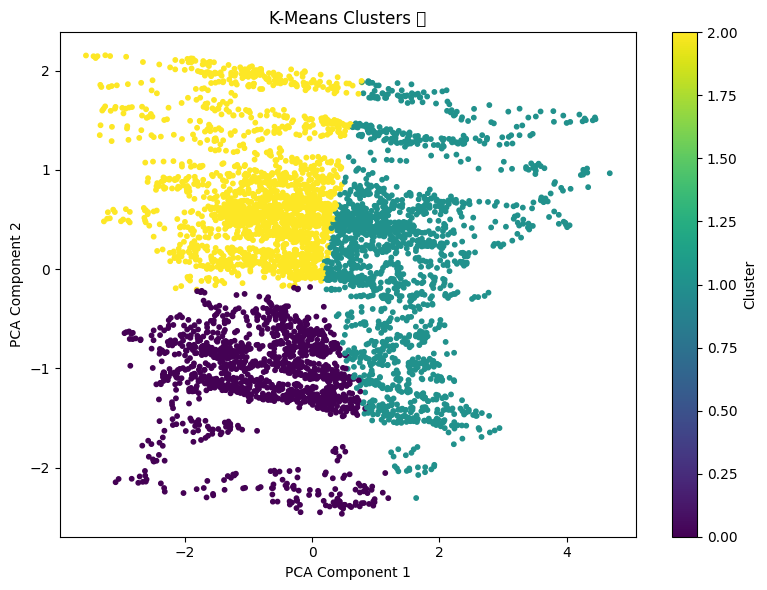

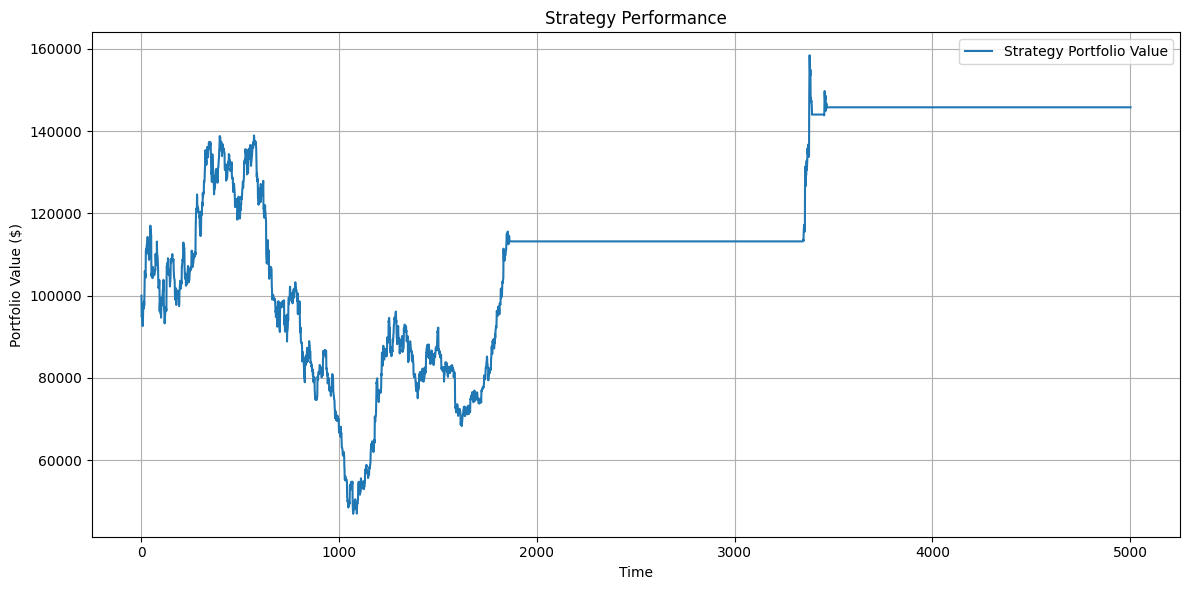

Final Market Return: 19.07%
Final Strategy Return: 45.80%
Results saved to 'tsla_clustered_signals.csv'


In [34]:
# ================================
# 🚀 Enhanced Cluster-Based Strategy (GPU-Accelerated)
# ================================

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import cudf
from cuml.cluster import KMeans as cuKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
import json, gc, os

# ✅ Set CUDA Paths
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

# ================================
# ✅ Utility Functions
# ================================
def fix_dataframe_index(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]

def compute_technical_indicators(df):
    df = df.copy()
    df = fix_dataframe_index(df)

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    df.dropna(inplace=True)
    return df

def assign_signals_by_forward_return(df_clustered, lookahead=10):
    df_clustered = df_clustered.copy()
    df_clustered['Future_Close'] = df_clustered['Close'].shift(-lookahead)
    df_clustered['Forward_Return'] = (df_clustered['Future_Close'] - df_clustered['Close']) / df_clustered['Close']

    cluster_returns = df_clustered.groupby('cluster')['Forward_Return'].mean()
    sorted_clusters = cluster_returns.sort_values(ascending=False).index.tolist()
    signal_map = {sorted_clusters[0]: 'Buy', sorted_clusters[1]: 'Hold', sorted_clusters[2]: 'Sell'}
    df_clustered['signal'] = df_clustered['cluster'].map(signal_map)
    return df_clustered, signal_map

def run_kmeans_clustering(df, n_clusters=3, visualize=True):
    features = ['RSI', 'MACD', 'OBV']
    df_selected = df.dropna(subset=features).copy()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_selected[features])
    X_cudf = cudf.DataFrame.from_records(X_scaled)

    kmeans = cuKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cudf)
    df_selected['cluster'] = cluster_labels.to_pandas().values

    if visualize:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_selected['cluster'], cmap='viridis', s=10)
        plt.title("K-Means Clusters \U0001F4C8")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.colorbar(label='Cluster')
        plt.tight_layout()
        plt.show()

    return df_selected[['cluster']], df_selected.index

def simulate_trading(df):
    initial_balance = 100000
    balance = initial_balance
    position = 0
    portfolio_values = []

    for i in range(len(df)):
        price = df.iloc[i]['Close']
        signal = df.iloc[i]['signal']

        if signal == 'Buy' and balance > 0:
            position = balance / price
            balance = 0
        elif signal == 'Sell' and position > 0:
            balance = position * price
            position = 0
        portfolio_values.append(balance if balance > 0 else position * price)

    final_value = portfolio_values[-1]
    return portfolio_values, final_value

def evaluate_performance(portfolio_values, market_start, market_end):
    cumulative_return = (portfolio_values[-1] / portfolio_values[0] - 1) * 100
    market_return = (market_end / market_start - 1) * 100
    return cumulative_return, market_return

# ================================
# ✅ Load Data & Apply Strategy
# ================================
df = yf.download("TSLA", period="720d", interval="1h")
df.reset_index(inplace=True)
df = compute_technical_indicators(df)

# Run Clustering
cluster_info, cluster_idx = run_kmeans_clustering(df)
df.loc[cluster_idx, 'cluster'] = cluster_info['cluster']
df, signal_map = assign_signals_by_forward_return(df)

# Simulate Strategy
portfolio_values, final_value = simulate_trading(df)
cumulative_return, market_return = evaluate_performance(portfolio_values, df['Close'].iloc[0], df['Close'].iloc[-1])

# ================================
# ✅ Visualization & Output
# ================================
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Strategy Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.title('Strategy Performance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Final Market Return: {market_return:.2f}%")
print(f"Final Strategy Return: {cumulative_return:.2f}%")

# Save
df.to_csv("tsla_clustered_signals.csv", index=False)
print("Results saved to 'tsla_clustered_signals.csv'")


[*********************100%***********************]  1 of 1 completed


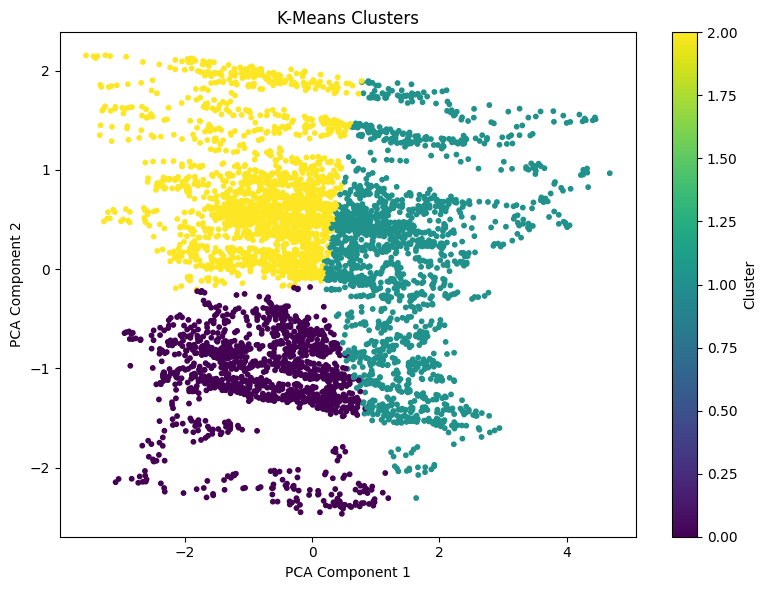

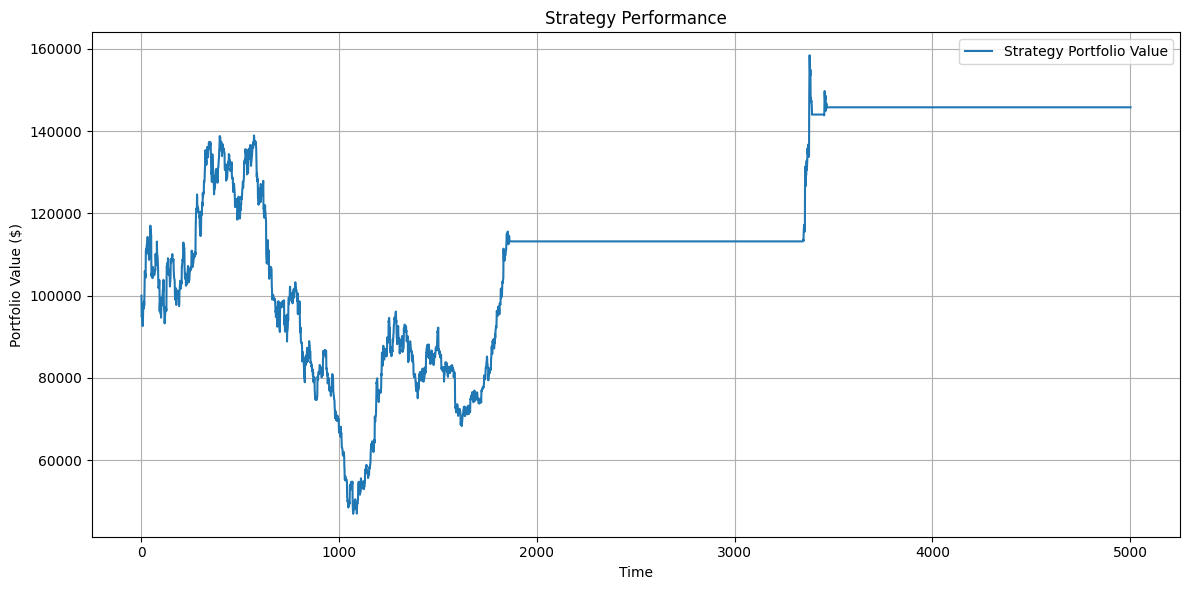

Final Market Return: 19.07%
Final Strategy Return: 45.80%
Sharpe Ratio: 0.17
Max Drawdown: 0.66
Results saved to 'tsla_clustered_signals.csv'

Rolling Backtest Summary:
    start   end  k  Strategy_Return  Market_Return    Sharpe  Max_Drawdown
0       0   500  2        22.076747      22.076747  0.464563      0.203072
1       0   500  3        34.362207      22.076747  1.042941      0.136424
2       0   500  4        36.008408      22.076747  0.853306      0.203072
3     300   800  2       -20.989416     -20.989416 -0.587496      0.360582
4     300   800  3         1.712377     -20.989416  0.077739      0.125767
5     300   800  4        -2.400748     -20.989416 -0.083528      0.173759
6     600  1100  2       -56.538148     -56.538148 -1.658513      0.632784
7     600  1100  3       -48.668226     -56.538148 -1.503670      0.500829
8     600  1100  4       -33.339432     -56.538148 -1.187856      0.423616
9     900  1400  2        -9.028316      -4.141746 -0.214858      0.458925
10    

In [33]:
# ================================
# 🚀 Enhanced Cluster-Based Strategy (GPU-Accelerated with Rolling Eval, Sharpe, Drawdown)
# ================================

import os
import gc
import json
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import cudf
from cuml.cluster import KMeans as cuKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set CUDA Paths
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

# ================================
# ✅ Utility Functions
# ================================

def fix_dataframe_index(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]

def compute_technical_indicators(df):
    df = fix_dataframe_index(df)
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    df.dropna(inplace=True)
    return df

def assign_signals_by_forward_return(df_clustered, lookahead=10):
    df_clustered = df_clustered.copy()
    df_clustered['Future_Close'] = df_clustered['Close'].shift(-lookahead)
    df_clustered['Forward_Return'] = (df_clustered['Future_Close'] - df_clustered['Close']) / df_clustered['Close']

    cluster_returns = df_clustered.groupby('cluster')['Forward_Return'].mean()
    sorted_clusters = cluster_returns.sort_values(ascending=False).index.tolist()

    labels = ['Buy', 'Hold', 'Sell']
    signal_map = {cluster: labels[i] if i < len(labels) else 'Hold' for i, cluster in enumerate(sorted_clusters)}
    df_clustered['signal'] = df_clustered['cluster'].map(signal_map)
    return df_clustered, signal_map

def run_kmeans_clustering(df, n_clusters=3, visualize=True):
    features = ['RSI', 'MACD', 'OBV']
    df_selected = df.dropna(subset=features).copy()

    if df_selected.shape[0] < n_clusters:
        return pd.DataFrame(index=df.index), df.index

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_selected[features])
    X_cudf = cudf.DataFrame.from_records(X_scaled)

    kmeans = cuKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cudf)
    df_selected['cluster'] = cluster_labels.to_pandas().values

    if visualize:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_selected['cluster'], cmap='viridis', s=10)
        plt.title("K-Means Clusters")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.colorbar(label='Cluster')
        plt.tight_layout()
        plt.show()

    return df_selected[['cluster']], df_selected.index

def simulate_trading(df):
    balance = 100000
    position = 0
    portfolio_values = []
    for i in range(len(df)):
        price = df.iloc[i]['Close']
        signal = df.iloc[i].get('signal', 'Hold')
        if signal == 'Buy' and balance > 0:
            position = balance / price
            balance = 0
        elif signal == 'Sell' and position > 0:
            balance = position * price
            position = 0
        portfolio_values.append(balance if balance > 0 else position * price)
    return portfolio_values, portfolio_values[-1]

def evaluate_performance(portfolio_values, market_start, market_end):
    strat_return = (portfolio_values[-1] / portfolio_values[0] - 1) * 100
    market_return = (market_end / market_start - 1) * 100
    sharpe = (np.mean(np.diff(portfolio_values)) / np.std(np.diff(portfolio_values))) * np.sqrt(252) if np.std(np.diff(portfolio_values)) > 0 else 0
    drawdown = max(1 - np.array(portfolio_values) / np.maximum.accumulate(portfolio_values))
    return strat_return, market_return, sharpe, drawdown

def rolling_backtest(df, window_size=500, step=300, k_values=[2, 3, 4]):
    results = []
    for start in range(0, len(df) - window_size, step):
        end = start + window_size
        df_window = df.iloc[start:end].copy()
        df_window = compute_technical_indicators(df_window)

        for k in k_values:
            if df_window.dropna(subset=['RSI', 'MACD', 'OBV']).shape[0] < k:
                continue
            cluster_info, cluster_idx = run_kmeans_clustering(df_window, n_clusters=k, visualize=False)
            df_window.loc[cluster_idx, 'cluster'] = cluster_info['cluster']
            df_window, _ = assign_signals_by_forward_return(df_window)
            portfolio_values, final_value = simulate_trading(df_window)
            strat_ret, mkt_ret, sharpe, drawdown = evaluate_performance(
                portfolio_values, df_window['Close'].iloc[0], df_window['Close'].iloc[-1]
            )
            results.append({
                'start': start, 'end': end, 'k': k,
                'Strategy_Return': strat_ret,
                'Market_Return': mkt_ret,
                'Sharpe': sharpe,
                'Max_Drawdown': drawdown
            })
    return pd.DataFrame(results)

# ================================
# ✅ Execute Strategy
# ================================
df = yf.download("TSLA", period="720d", interval="1h")
df.reset_index(inplace=True)
df = compute_technical_indicators(df)

cluster_info, cluster_idx = run_kmeans_clustering(df)
df.loc[cluster_idx, 'cluster'] = cluster_info['cluster']
df, signal_map = assign_signals_by_forward_return(df)
portfolio_values, final_value = simulate_trading(df)
strat_return, market_return, sharpe, drawdown = evaluate_performance(portfolio_values, df['Close'].iloc[0], df['Close'].iloc[-1])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Strategy Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.title('Strategy Performance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print Final Performance
print(f"Final Market Return: {market_return:.2f}%")
print(f"Final Strategy Return: {strat_return:.2f}%")
print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Max Drawdown: {drawdown:.2f}")

# Save result
df.to_csv("tsla_clustered_signals.csv", index=False)
print("Results saved to 'tsla_clustered_signals.csv'")

# Run Rolling Evaluation
rolling_df = rolling_backtest(df, window_size=500, step=300, k_values=[2, 3, 4])
print("\nRolling Backtest Summary:")
print(rolling_df)
